# **Decision Tree**

## Theory

* A decision tree is a flowchart-like structure used to make decisions or predictions.
* It systematically partitions data based on feature values to arrive at predictive outcomes.
* It operates by recursively splitting the data into subsets, each defined by specific feature thresholds, until terminal nodes—called leaves—are reached, which represent the predicted outputs. 

**How Decision Tree Works?** <br>
At a high level, Decision Trees function through a process known as recursive binary splitting (or multi-way splitting, depending on the implementation):
* Node Splitting: Starting at the root, the algorithm selects a feature and a threshold that maximizes a predefined metric (e.g., Information Gain or Gini Impurity).

* Partitioning Data: Based on the selected threshold, data is divided into subsets. Each subset becomes a child node of the current node.

* Stopping Criterion: The process continues recursively until certain conditions are met, such as a maximum depth, minimum number of samples per leaf, or zero improvement in the splitting metric.

* Leaf Assignment: Terminal nodes are assigned predicted values based on the majority class (classification) or mean/median (regression) of the samples within the node.

**Core Idea**
* Interpretability: Decision Trees are inherently interpretable. Their hierarchical structure allows us to trace the path of decisions, making them especially useful for scenarios where model transparency is critical.

* Non-linear Decision Boundaries: By partitioning data at various thresholds, Decision Trees can model complex, non-linear relationships between features and the target variable.

* Flexibility: They accommodate both categorical and continuous input features, and can adapt to various levels of complexity by adjusting their depth.

**Advantages**
* Simplicity: Decision Trees require minimal data preprocessing and are intuitive to construct.

* Explainability: The step-by-step decision-making process can be visualized and understood by stakeholders.

* Scalability: They perform well on small to medium-sized datasets and can be extended through ensembles like Random Forests.

**Disadvantage**
* Overfitting: Trees are prone to overfitting, especially when grown to large depths without pruning.

* Instability: Small changes in the data can result in significantly different tree structures.

* Bias: Trees may favor features with more levels (e.g., numerical over categorical).

## Implementation

In [76]:
import numpy as np
import pandas as pd
from sklearn import tree

In [86]:
import numpy as np
import pandas as pd

# Function to calculate entropy
def calculate_entropy(target):
    values, counts = np.unique(target, return_counts=True)
    probabilities = counts / len(target)
    return -np.sum(probabilities * np.log2(probabilities))

# Function to calculate information gain
def information_gain(data, feature, target):
    # Total entropy of the target
    total_entropy = calculate_entropy(data[target])
    
    # Calculate weighted entropy of splits
    values, counts = np.unique(data[feature], return_counts=True)
    weighted_entropy = np.sum(
        [(counts[i] / len(data)) * calculate_entropy(data[data[feature] == values[i]][target])
        for i in range(len(values))]
    )
    
    # Information Gain
    return total_entropy - weighted_entropy

# Decision Tree Node
class DecisionTreeNode:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

# Decision Tree Classifier
class DecisionTreeClassifier:
    def __init__(self, min_samples_split=2, max_depth=None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.tree = None

    def fit(self, data, target):
        self.features = [col for col in data.columns if col != target]
        self.target = target
        self.tree = self._build_tree(data)

    def _build_tree(self, data, depth=0):
        # If stopping criteria is met, return a leaf node
        if len(data) < self.min_samples_split or (self.max_depth and depth >= self.max_depth):
            return DecisionTreeNode(value=data[self.target].mode()[0])
        
        # Find the best split
        best_feature, best_gain = None, 0
        for feature in self.features:
            gain = information_gain(data, feature, self.target)
            if gain > best_gain:
                best_feature, best_gain = feature, gain
        
        # If no good split is found, return a leaf node
        if best_gain == 0:
            return DecisionTreeNode(value=data[self.target].mode()[0])
        
        # Split data and build subtrees
        left_split = data[data[best_feature] == data[best_feature].unique()[0]]
        right_split = data[data[best_feature] != data[best_feature].unique()[0]]
        
        left_subtree = self._build_tree(left_split, depth + 1)
        right_subtree = self._build_tree(right_split, depth + 1)
        
        return DecisionTreeNode(feature=best_feature, left=left_subtree, right=right_subtree)

    def predict_instance(self, instance, tree):
        # If leaf node, return value
        if tree.value is not None:
            return tree.value
        
        # Traverse left or right subtree
        if instance[tree.feature] == instance[tree.feature].unique()[0]:
            return self.predict_instance(instance, tree.left)
        else:
            return self.predict_instance(instance, tree.right)

    def predict(self, data):
        return data.apply(lambda row: self.predict_instance(row, self.tree), axis=1)

data = pd.DataFrame({
    "Age": [25, 45, 35, 50, 23, 30, 40, 38, 33, 29],
    "Income": [50000, 100000, 75000, 120000, 45000, 55000, 95000, 85000, 78000, 60000],
    "Previous_Purchase": ["Yes", "No", "Yes", "No", "No", "Yes", "Yes", "Yes", "No", "Yes"],
    "Buy_Product": ["Yes", "No", "Yes", "No", "No", "Yes", "Yes", "Yes", "No", "Yes"]
})
model = DecisionTreeClassifier()
data[['Age','Income','Previous_Purchase']]
model.fit(data,'Buy_Product')
# # Predict on the data
# predictions = model.predict(data[['Age', 'Income', 'Previous_Purchase']])
# print(predictions)

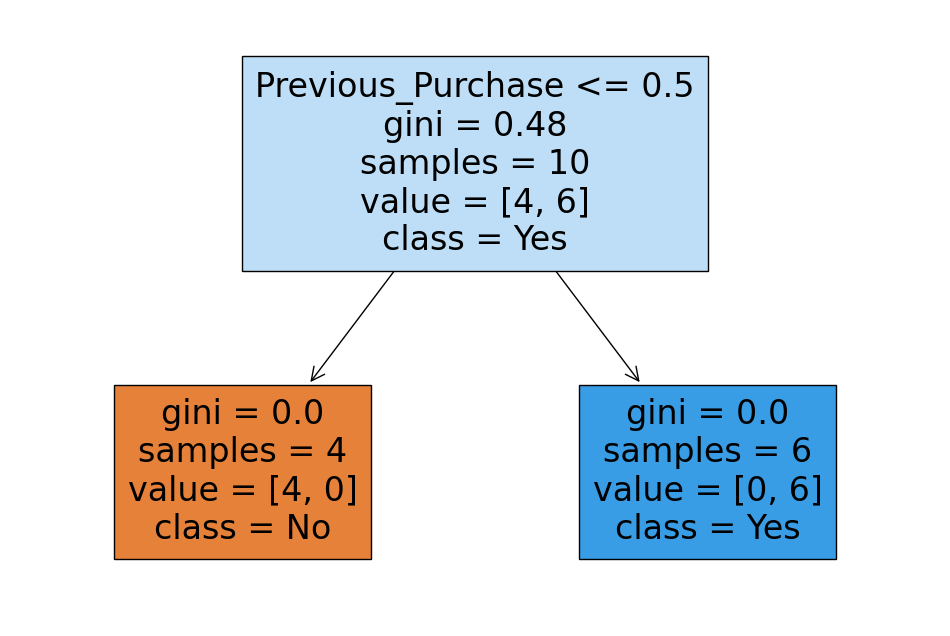

In [88]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Sample data
data = pd.DataFrame({
    "Age": [25, 45, 35, 50, 23, 30, 40, 38, 33, 29],
    "Income": [50000, 100000, 75000, 120000, 45000, 55000, 95000, 85000, 78000, 60000],
    "Previous_Purchase": ["Yes", "No", "Yes", "No", "No", "Yes", "Yes", "Yes", "No", "Yes"],
    "Buy_Product": ["Yes", "No", "Yes", "No", "No", "Yes", "Yes", "Yes", "No", "Yes"]
})

# Convert categorical columns to numeric values
data["Previous_Purchase"] = data["Previous_Purchase"].map({"Yes": 1, "No": 0})
data["Buy_Product"] = data["Buy_Product"].map({"Yes": 1, "No": 0})

# Separate features and target
X = data[['Age', 'Income', 'Previous_Purchase']]
y = data['Buy_Product']

# Initialize and fit the DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=["No", "Yes"])
plt.show()


In [29]:
def calculate_entropy(target):
    values, counts = np.unique(target, return_counts=True)
    print(values, counts)
    probabilities = counts / len(target)
    print(probabilities)
    print(probabilities, np.log2(probabilities))
    return -np.sum(probabilities * np.log2(probabilities))


target_data = ["Yes", "No", "Yes", "No", "No", "Yes", "No", "No"]
print("Entropy (NumPy):", calculate_entropy(target_data))

['No' 'Yes'] [5 3]
[0.625 0.375]
[0.625 0.375] [-0.67807191 -1.4150375 ]
Entropy (NumPy): 0.954434002924965


In [59]:
def calculate_entropy(target):
    values,counts = np.unique(target,return_counts=True)
    length = len(target)
    probabilities = counts / length
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy


Entropy (NumPy): 0.954434002924965


In [30]:
df = pd.DataFrame({
    "Weather": ["Sunny", "Sunny", "Overcast", "Rainy", "Rainy", "Rainy", "Overcast", "Sunny", "Sunny", "Rainy"],
    "Play": ["No", "No", "Yes", "Yes", "Yes", "No", "Yes", "No", "Yes", "Yes"]
})

In [46]:
df

,Weather,Play
0,Sunny,No
1,Sunny,No
2,Overcast,Yes
3,Rainy,Yes
4,Rainy,Yes
5,Rainy,No
6,Overcast,Yes
7,Sunny,No
8,Sunny,Yes
9,Rainy,Yes


In [32]:
df[df['Weather'] == 'Sunny']

,Weather,Play
0,Sunny,No
1,Sunny,No
7,Sunny,No
8,Sunny,Yes


In [75]:
def information_gain(data, target, col):
    total_entropy = calculate_entropy(data[target])
    values, counts = np.unique(data[col], return_counts=True)
    weighted_entropy = np.sum([(counts[i] / len(data)) * calculate_entropy(
        data[data[col] == values[i]][target]) for i in range(len(values))])
    print(weighted_entropy)
    return total_entropy - weighted_entropy


information_gain(df, 'Play', 'Weather')

0.6490224995673063


0.3219280948873623